# Linear-layer based models with gradlite

This notebook showcases how `gradlite` can be used to implement models using linear layers.

## Dependencies

The following imports are required for the notebook to function properly:

In [ ]:
import matplotlib.pyplot as plt

from gradlite.nn.linear import Linear
from gradlite.nn.activations import ReLU
from gradlite.nn.loss.mse import MSE
from gradlite.nn.loss.mae import MAE
from gradlite.optimizer.sgd import SGD


plt.style.use('ggplot')

## Data definition

Let us define example data for the model to learn. Note that this sample data simply represents a linear regression with params $a=0.3$ and $b=2.5$, that is:

$f(x) = 0.3x + 2.5$

In [2]:
a = 0.3
b = 2.5

x_value = 2
max_x_value = 10
step = 0.1
X: list[float] = []
y: list[float] = []
while x_value < max_x_value:
    X.append(x_value)
    y.append(a * x_value + b)
    x_value += step

## Model training

The following code showcases how `gradlite` can be used to train a simple linear model:

Final params:  frozenset({Parameter(0.3066000000000201), Parameter(2.4719999999998388)})


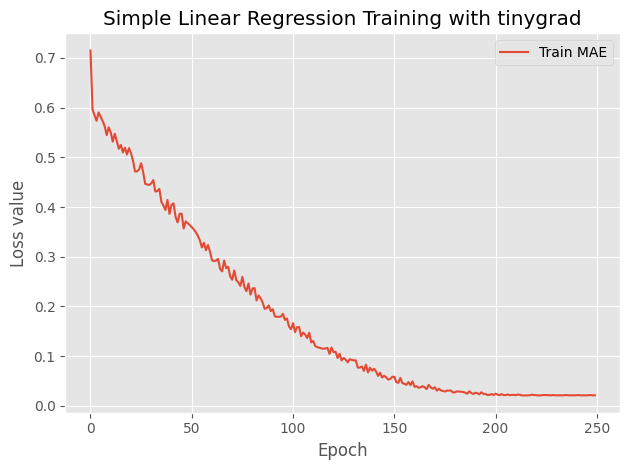

In [ ]:
epochs = 250
model = Linear(input_features=1, output_features=1, activation_fn=ReLU())
model.neurons[0].weights[0].value = 0.5  # Using positive weight to prevent Dying ReLU
optimizer = SGD(model.parameters(), lr=1e-3)
loss_fn = MAE()  # Can use MSE instead
loss_values: list[float] = []

for _ in range(epochs):
    epoch_loss = 0.0
    for x_value, y_true in zip(X, y):
        optimizer.zero_grad()
        y_pred = model([x_value])
        loss = loss_fn(y_pred, [y_true])
        loss.backward()
        optimizer.step()
        epoch_loss += loss.value
    loss_values.append(epoch_loss / len(X))

print('Final params: ', model.parameters())
plt.plot([epoch_id for epoch_id in range(epochs)], loss_values,
         label='Train MAE')
plt.title('Simple Linear Regression Training with gradlite')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.tight_layout()
plt.legend()
plt.show()
plt.close()

As can be seen, the previous $a$ and $b$ params are learned correctly using backpropagation and SGD. Note that the error with respect to the expected values corresponds to the precision we can achieve using the current learning rate, smaller lr values allow the model to adjust the gradients in a more precise way.